# monogamy of OTOC

$H = H_1 + H_2 + H_3 + H_{12}+ H_{23}$

$H_1=\alpha J_{y_1} +\frac{k_1}{2J_1}J_{z_1}^2\sum_{n=-\infty}^{\infty}\delta(t-n\tau)$

Where $\large{\alpha = \frac{\hslash p}{\tau}}$ from Haake paper on Kicked top.

#### For single kicked top
Link: [Classical and quantum chaos for a kicked top by Haake](https://link.springer.com/article/10.1007/BF01303727)

Drive link: [F Haake Classical and Quantum Chaos for a Kicked top.pdf](https://drive.google.com/file/d/1inHX4e8KOc9bSNvuQqZrA7Ikxzizlyd0/view?usp=sharing)

$H_{ij}=\frac{\Delta_{ij}}{2\sqrt{J_i J_j}}J_{zi}J_{zj}\sum_{n=-\infty}^{\infty}\delta(t-n\tau)$

$U_{1} = exp(-i\frac{k}{2J_1}J_{z1}^2)\cdot exp(-i\alpha J_{y1})$

$U_{12} = exp({-i\frac{\Delta}{2\sqrt{J_1 J_2}}(J_{z1}\otimes J_{z2}}))$

$U=(U_{12}\otimes I_3)(I_1\otimes U_{23})(U_1\otimes U_2 \otimes U_3)$

Related papers:

[Entanglement in coupled kicked tops with chaotic dynamics](https://arxiv.org/pdf/1910.13447.pdf)

[Signatures of chaos in the entanglement of two coupled quantum kicked tops](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.60.1542)

1) ##  3 kicked top Hamiltonians Version 1.0
For understanding the entanglement groth and information scrambling.

In [1]:
using QuantumOptics
import PyPlot as plt
using NPZ
using SparseArrays
using LinearAlgebra

In [2]:
#------------------------------------------------
# Parameters
k1 = 5;
k2 = 10;
k3 = 6;
j1 = 8
j2 = 10
j3 = 9
p = 1.4
ϵpow= 14; ϵ = 10.0^(-ϵpow) #precision
Δ12 = 1; Δ23 = 3 # coupling strength.
N1 = convert(Int64,2*j1+1) # N1 is the dimension of the 1st hilbert space (2j1 +1).
N2 = convert(Int64,2*j2+1) # N2 is the dimension of the 2nd hilbert space (2j2 +1).
N3 = convert(Int64,2*j3+1) # N3 is the dimension of the 3rd hilbert space (2j3 +1)
#------------------------------------------------

# Basis
b1 = SpinBasis(j1)
b2 = SpinBasis(j2)
b3 = SpinBasis(j3)


# Operator creation
Jy1 = 0.5*sigmay(b1)
Jz1 = 0.5*sigmaz(b1)

Jy2 = 0.5*sigmay(b2)
Jz2 = 0.5*sigmaz(b2)

Jy3 = 0.5*sigmay(b3)
Jz3 = 0.5*sigmaz(b3)

Operator(dim=19x19)
  basis: Spin(9)sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19], [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19], ComplexF64[9.0 + 0.0im, 8.0 + 0.0im, 7.0 + 0.0im, 6.0 + 0.0im, 5.0 + 0.0im, 4.0 + 0.0im, 3.0 + 0.0im, 2.0 + 0.0im, 1.0 + 0.0im, -1.0 + 0.0im, -2.0 + 0.0im, -3.0 + 0.0im, -4.0 + 0.0im, -5.0 + 0.0im, -6.0 + 0.0im, -7.0 + 0.0im, -8.0 + 0.0im, -9.0 + 0.0im], 19, 19)

In [ ]:
# Floquet operators
# U1 for j=j1
U1 = fastExpm(-1im*k1*Jz1*Jz1/(2*j1),nonzero_tol=ϵ)*fastExpm(-1im*p*Jy1,nonzero_tol = ϵ);
#U2 = sparse(U1)

# U2 for j=j2
U2 = fastExpm(-1im*k2*Jz2*Jz2/(2*j2) ,nonzero_tol=ϵ)*fastExpm(-1im*p*Jy2 ,nonzero_tol = ϵ);
#U2 = sparse(U2)

# U12 Floquet for coupling term
U12 = fastExpm(-1im * Δ12* (kron(Jz1,Jz2)) / (2 * sqrt(j1 * j2) ),nonzero_tol = ϵ);

# Unitary evolution Floquet operator
U = U12 * kron(U1,U2)

In [3]:
# Floquet operators
# U1 for j=j1
U1 = exp(dense(-1im*k1*Jy1*Jy1/(2*(j1+1/2))))*exp(dense(-1im*α*Jz1));
#U1.data[abs.(U1.data) .< ϵ] .= 0 # If matrix element is bellow ϵ;
U1=sparse(U1) # making it sparse matrix.
#n = nnz(U1.data)
#println("Number of non zero elements in U1 are $n")

# U2 for j=j2
U2 = exp(dense(-1im*k2*Jy2*Jy2/(2*(j2+1/2))))*exp(dense(-1im*α*Jz2));
#U2.data[abs.(U2.data) .< ϵ] .= 0 # If matrix element is bellow ϵ;
U2=sparse(U2) # making it sparse matrix.
#n = nnz(U2.data)
#println("Number of non zero elements in U2 are $n")

# U3 for j=j3
U3 = exp(dense(-1im*k3*Jy3*Jy3/(2*(j3+1/2))))*exp(dense(-1im*α*Jz3));
#U3.data[abs.(U3.data) .< ϵ] .= 0 # If matrix element is bellow ϵ;
U3=sparse(U3) # making it sparse matrix.
#n = nnz(U3.data)
#println("Number of non zero elements in U3 are $n")



# U12 Floquet for coupling term
U12 = exp(dense(-1im * Δ12*(Jy1⊗Jy2) / (2 * (j1 + 1/2) * (j2 + 1/2))));
#U12.data[abs.(U12.data) .< ϵ] .= 0 # If matrix element is bellow ϵ;
U12=sparse(U12) # making it sparse matrix.
#n = nnz(U12.data)
#println("Number of non zero elements in U12 are $n")

# U23 Floquet for coupling term
U23 = exp(dense(-1im * Δ23*(Jy2⊗Jy3) / (2 * (j2 + 1/2) * (j3 + 1/2))));
#U23.data[abs.(U23.data) .< ϵ] .= 0 # If matrix element is bellow ϵ;
U23=sparse(U23) # making it sparse matrix.
#n = nnz(U23.data)
#println("Number of non zero elements in U23 are $n")

Operator(dim=323x323)
  basis: [Spin(8) ⊗ Spin(9)]sparse([1, 3, 5, 7, 9, 11, 19, 21, 23, 25  …  299, 301, 303, 305, 313, 315, 317, 319, 321, 323], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  323, 323, 323, 323, 323, 323, 323, 323, 323, 323], ComplexF64[0.999655102485415 + 0.0im, 0.0004720644988309 - 0.0im, 2.2898290778e-7 + 0.0im, 9.594627e-11 + 0.0im, 3.27e-14 + 0.0im, 1.0e-17 + 0.0im, 0.0 + 0.02624514312496942im, 0.0 + 1.933876505048e-5im, 0.0 + 1.078859054e-8im, 0.0 + 4.69428e-12im  …  0.0 + 4.69428e-12im, 0.0 + 1.078859054e-8im, 0.0 + 1.933876505048e-5im, 0.0 + 0.02624514312496942im, 1.0e-17 + 0.0im, 3.27e-14 - 0.0im, 9.594627e-11 + 0.0im, 2.2898290778e-7 - 0.0im, 0.0004720644988309 + 0.0im, 0.999655102485415 + 0.0im], 323, 323)

In [7]:
# Unitary floquet operator of whole system
U = dense((U12⊗identityoperator(b3))*(identityoperator(b1)⊗U23)*(U1 ⊗ U2 ⊗ U3))
U_off23 = dense((U12⊗identityoperator(b3))*(U1 ⊗ U2 ⊗ U3))


Operator(dim=5491x5491)
  basis: [Spin(8) ⊗ Spin(8) ⊗ Spin(9)]
   -0.212585+0.0521971im    …  -0.000187761+0.000393043im
         0.0+0.0im                      0.0+0.0im
   -0.146122-0.0246126im         0.00150254-0.000367735im
         0.0+0.0im                      0.0+0.0im
  -0.0994097-0.0709756im       -0.000239688-0.00133695im
         0.0+0.0im          …           0.0+0.0im
  -0.0475571-0.0963788im        -0.00125475-0.00111337im
         0.0+0.0im                      0.0+0.0im
   0.0105834-0.0904701im         -0.0017262-2.39809e-5im
         0.0+0.0im                      0.0+0.0im
   0.0654308-0.0596314im    …   -0.00172459+0.00108389im
         0.0+0.0im                      0.0+0.0im
   0.0716933-0.00522265im       -0.00114824+0.00201213im
            ⋮               ⋱              ⋮
         0.0+0.0im                      0.0+0.0im
  0.00172459-0.00108389im   …    -0.0654308+0.0596314im
         0.0+0.0im                      0.0+0.0im
   0.0017262+2.39809e-5im        -0

2) ##  3 kicked top Hamiltonians Version 2.0
For understanding the entanglement groth and information scrambling.

In [1]:
using QuantumOptics
using SparseArrays
using LinearAlgebra
using Statistics
using FastExpm
import PyPlot as plt
using ProgressMeter
using NPZ

In [26]:
#------------------------------------------------
# Parameters
k1 = 7;
k2 = 6;
k3 = 7.3;

j1 = 8
j2 = 8
j3 = 9

p = 1.73
ϵpow= 14; ϵ = 10.0^(-ϵpow) #precision
Δ12 = 0.2; Δ23 = 0.2 # coupling strength.
N1 = convert(Int64,2*j1+1) # N1 is the dimension of the 1st hilbert space (2j1 +1).
N2 = convert(Int64,2*j2+1) # N2 is the dimension of the 2nd hilbert space (2j2 +1).
N3 = convert(Int64,2*j3+1) # N3 is the dimension of the 3rd hilbert space (2j3 +1)
#------------------------------------------------

# Basis
b1 = SpinBasis(j1)
b2 = SpinBasis(j2)
b3 = SpinBasis(j3)

# Operator creation
Jy1 = 0.5*sparse(sigmay(b1).data)
Jz1 = 0.5*sparse(sigmaz(b1).data)

Jy2 = 0.5*sparse(sigmay(b2).data)
Jz2 = 0.5*sparse(sigmaz(b2).data)

Jy3 = 0.5*sparse(sigmay(b3).data)
Jz3 = 0.5*sparse(sigmaz(b3).data);

In [27]:
# Floquet operators
# U1 for j=j1
U1 = fastExpm(-1im*k1*Jz1*Jz1/(2*j1), threshold=1e-15,nonzero_tol=ϵ)*fastExpm(-1im*p*Jy1,threshold=1e-15,nonzero_tol = ϵ);
# U2 for j=j2
U2 = fastExpm(-1im*k2*Jz2*Jz2/(2*j2),threshold=1e-15 ,nonzero_tol=ϵ)*fastExpm(-1im*p*Jy2,threshold=1e-15 ,nonzero_tol = ϵ);
# U3 for j=j3
U3 = fastExpm(-1im*k3*Jz3*Jz3/(2*(j3+1/2)),threshold=1e-15,nonzero_tol=ϵ) * fastExpm(-1im*p*Jy3,threshold=1e-15,nonzero_tol = ϵ);

# U12 Floquet for coupling term
U12 = fastExpm(-1im * Δ12* (kron(Jz1,Jz2)) / (2 * sqrt(j1 * j2) ),threshold=1e-15,nonzero_tol = ϵ);
# U23 Floquet for coupling term
U23 = fastExpm(-1im * Δ23*kron(Jz2,Jz3) / (2 * sqrt(j2 * j3)),threshold=1e-15 ,nonzero_tol = ϵ);

# U12 an U23 ∈ H1⊗H2⊗ H3
U12 = kron(U12,Matrix{ComplexF64}(I,N3,N3));
U23 = kron(Matrix{ComplexF64}(I,N1,N1),U23)

# Unitary floquet operator of whole system
U = U12*U23*kron(U1,U2,U3)
U_off23 = U12*kron(U1,U2,U3)

5491×5491 Matrix{ComplexF64}:
 -2.46967e-10-3.12467e-10im  …   -7.31813e-7-9.25901e-7im
 -8.09297e-10-1.81003e-9im         1.7418e-6+3.89562e-6im
   -5.4794e-9-3.99775e-9im        -8.5655e-6-6.24937e-6im
  -1.45409e-8+1.12418e-8im        1.65098e-5-1.2764e-5im
   3.80203e-8+1.72802e-8im        3.13541e-5+1.42504e-5im
  -6.03932e-8-5.54655e-8im   …     3.6174e-5+3.32224e-5im
   1.35679e-7+4.06026e-8im        5.90271e-5+1.76641e-5im
  -1.30116e-7+1.74384e-7im        4.11148e-5-5.5103e-5im
  -2.91961e-7-6.61669e-8im       -6.70073e-5-1.51858e-5im
  -3.04107e-7-2.11225e-7im        5.06937e-5+3.52105e-5im
  -4.01971e-7-9.10985e-8im   …   -4.86689e-5-1.10298e-5im
  -2.46644e-7+3.30558e-7im        2.16899e-5-2.90693e-5im
   3.54099e-7+1.05966e-7im        2.26173e-5+6.76832e-6im
             ⋮               ⋱              ⋮
  -2.16899e-5+2.90693e-5im        2.46644e-7-3.30558e-7im
  -4.86689e-5-1.10298e-5im   …   -4.01971e-7-9.10985e-8im
  -5.06937e-5-3.52105e-5im        3.04107e-7+2.11225e-7i

3. ### OTOC and operatpr sprading version 2.0

$OTOC_{max} = \frac{1}{d}Tr(|[A_t,B]|^2)$. Max means with respect to maximally mixed state.

$OTOC_{\rho} = Tr(\rho*|[A_t,B]|^2)$

Here floquet $U$ comute with $Ry = e^{-iπJy}$. So in this basis U is block diagonal. In the same basis $Jy$ 
will atleast be block diagonal. $Jy$ can be again reduce in that subspace and it is possible to make it 
diagonal. But let's take the block diagonal form. Use $A = Jy$, $B = Jy$ to calculate OTOC, because of subsspace division we can go much higher dimensin. Consider $Λ'*Jy*Λ$, make $Jy$ as block diagonal matrix.

In [25]:
#------------------------------------------------
kicks = 100

#t_off = 40 # turnoff the interaction after t_off
#t_on = 90 # turnon again after t_on
#------------------------------------------------

time_array = zeros(1,kicks)

1×100 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

## OTOC calculation

In [5]:
# OTOC is (Jy1⊗I⊗I)_t and (I⊗Jy2⊗I) 
# changing the Hilbert space into bigger Hilbert space. H1 or H2 or H3 → H1⊗H2⊗H3
A_Jy2 =  kron(sparse(I,N1,N1),Jy2,sparse(I,N3,N3));
B_Jy1 =  kron(Jy1,sparse(I,N2,N2),sparse(I,N3,N3))
        
OTOC12_max = zeros(1,kicks)
At = A_Jy2
B = B_Jy1
    
    
@showprogress for i = 1:kicks
    time_array[1,i] = i
    commutator = At * B - B * At
    OTOC12_max[1,i] = (1/N1*N2*N3)*tr(commutator' * commutator)
    At = U * At * U'
end
#------------------------------------------------

Progress: 100%|█████████████████████████████████████████| Time: 0:12:11


In [6]:



# OTOC is (I⊗Jy2⊗I)_t and (I⊗I⊗Jy3)
# making Hilbert space in bigger Hilbert space
A_Jy2 =  kron(sparse(I,N1,N1),Jy2,sparse(I,N3,N3));
B_Jy3 =  kron(sparse(I,N1,N1),sparse(I,N2,N2),Jy3)

OTOC23_max = zeros(1,kicks)
At = A_Jy2
B = B_Jy3
@showprogress for i = 1:kicks
    commutator = At * B - B * At
    OTOC23_max[1,i] = (1/N1*N2*N3)*tr(commutator' * commutator)
    At = U*At*U'
end

Progress: 100%|█████████████████████████████████████████| Time: 0:12:26


In [10]:
# data saving
save_data = [time_array; OTOC12_max]
npzwrite("data2/OTOC12max_Jy2_Jy1 $j1 $j2 $j3 $k1 $k2 $k3 Δ12=$Δ12 Δ23=$Δ23 $kicks.npy", save_data)
println("data saved in name of: OTOC12max_Jy2_Jy1 $j1 $j2 $j3 $k1 $k2 $k3 Δ12=$Δ12 Δ23=$Δ23 $kicks.npy")

save_data = [time_array; OTOC23_max]
npzwrite("data2/OTOC23max_Jy2_Jy3 $j1 $j2 $j3 $k1 $k2 $k3 Δ12=$Δ12 Δ23=$Δ23 $kicks.npy", save_data)
println("data saved in name of: OTOC23max_Jy2_Jy3 $j1 $j2 $j3 $k1 $k2 $k3 Δ12=$Δ12 Δ23=$Δ23 $kicks.npy")

data saved in name of: OTOC12max_Jy2_Jy1 8 8 9 7 6 7.3 Δ12=0.2 Δ23=0.2 100.npy
data saved in name of: OTOC23max_Jy2_Jy3 8 8 9 7 6 7.3 Δ12=0.2 Δ23=0.2 100.npy


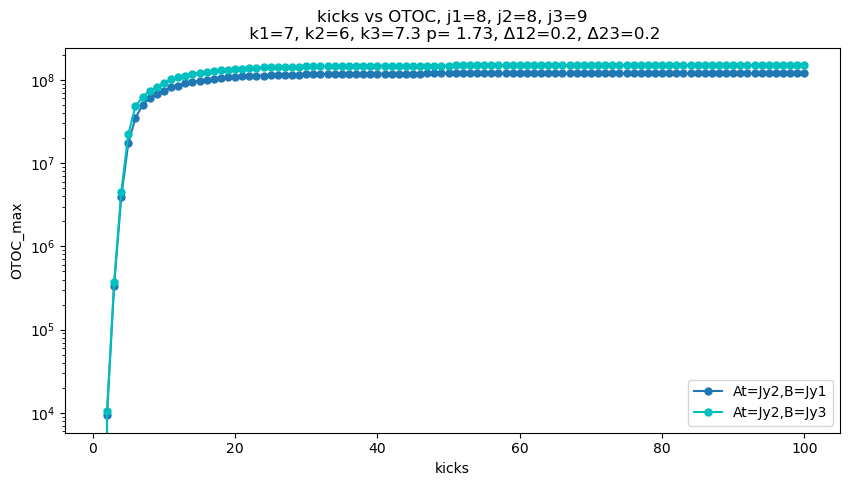

In [43]:
plt.figure(figsize=(10,5))
plt.plot(time_array',OTOC12_max',".-",markersize=10, label = "At=Jy2,B=Jy1")
plt.plot(time_array',OTOC23_max',"c.-",markersize=10,label = "At=Jy2,B=Jy3")
plt.title("kicks vs OTOC, j1=$j1, j2=$j2, j3=$j3\n k1=$k1, k2=$k2, k3=$k3 p= $(round(p,digits = 3)), Δ12=$Δ12, Δ23=$Δ23")
plt.xlabel("kicks")
plt.yscale("log")
#plt.xscale("log")
plt.ylabel("OTOC_max")
plt.legend()

#plt.savefig("plots/new_plots/ OTOC ccc 3kicked top 100.png")
#plt.savefig("plots/new_plots/ OTOC ccc 3kicked top weigner semilog 100.png")
#plt.savefig("plots/new_plots/ OTOC ccc 3kicked top weigner loglog 100.png")

### On and offf is present bellow

In [12]:
# If on-off is present.
kicks = 100
t_off = 7 #At kicks = t_off, At = U_off23 * At * U_off23'
t_on = 70 #At kicks = t_on, At = U * At * U'
#----------------------------------
time_array = zeros(1,kicks)

OTOC12_max_onoff = zeros(1,kicks)
OTOC23_max_onoff = zeros(1,kicks)

# making Hilbert space in bigger Hilbert space
A_Jy2 =  kron(sparse(I,N1,N1),Jy2,sparse(I,N3,N3));
B1_Jy1 = kron(Jy1,sparse(I,N2,N2),sparse(I,N3,N3));
B2_Jy3 = kron(sparse(I,N1,N1),sparse(I,N2,N2),Jy3);

At = A_Jy2
B2 = B1_Jy1
B3 = B2_Jy3
@showprogress for i = 1:kicks
    time_array[1,i] = i
    commutator2 = At * B2 - B2 * At
    OTOC12_max_onoff[1,i] = (1/N1*N2*N3)*tr(commutator2' * commutator2)
    
    commutator3 = At * B3 - B3 * At
    OTOC23_max_onoff[1,i] = (1/N1*N2*N3)*tr(commutator3' * commutator3)
    
    if i < t_off || i ≥ t_on
        At = U * At * U'
    else
        At = U_off23 * At * U_off23'
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:16:45


In [13]:
# data saving
save_data = [time_array; OTOC12_max_onoff]
npzwrite("data2/OTOC12max_Jy2_Jy1 $j1 $j2 $j3 $k1 $k2 $k3 Δ12=$Δ12 Δ23=$Δ23 $kicks $t_off $t_on.npy", save_data)
println("data saved in name of: OTOC12max_Jy2_Jy1 $j1 $j2 $j3 $k1 $k2 $k3 Δ12=$Δ12 Δ23=$Δ23 $kicks $t_off $t_on.npy")

save_data = [time_array; OTOC23_max_onoff]
npzwrite("data2/OTOC23max_Jy2_Jy3 $j1 $j2 $j3 $k1 $k2 $k3 Δ12=$Δ12 Δ23=$Δ23 $kicks $t_off $t_on.npy", save_data)
println("data saved in name of: OTOC23max_Jy2_Jy3 $j1 $j2 $j3 $k1 $k2 $k3 Δ12=$Δ12 Δ23=$Δ23 $kicks $t_off $t_on.npy")

data saved in name of: OTOC12max_Jy2_Jy1 8 8 9 7 6 7.3 Δ12=0.2 Δ23=0.2 100 7 70.npy
data saved in name of: OTOC23max_Jy2_Jy3 8 8 9 7 6 7.3 Δ12=0.2 Δ23=0.2 100 7 70.npy


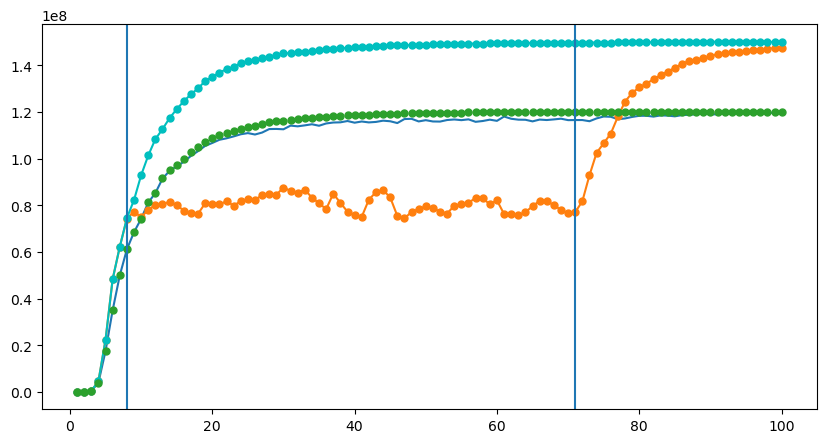

PyObject <matplotlib.lines.Line2D object at 0x7f4c15e6d580>

In [38]:
plt.figure(figsize=(10,5))
plt.plot(time_array',OTOC12_max_onoff', "-",markersize=10, label = "1⊗2")
plt.plot(time_array',OTOC23_max_onoff', ".-",markersize=10, label = "1⊗2")
plt.plot(time_array',OTOC23_max',"c.-",markersize=10,label = "At=Jy2,B=Jy3")
plt.plot(time_array',OTOC12_max',".",markersize=10, label = "At=Jy2,B=Jy1")
plt.axvline(x=7+1)
plt.axvline(x=71)

## Fidelity check of quantum state

To do this part we first calculate the Floquet operator. Floquet operator are calculated earlier so run that part 1st before running this section.

In [60]:
ψ01 = Matrix{Float64}(I,N1,N1)[:,1]
ψ02 = Matrix{Float64}(I,N2,N2)[:,1]
ψ03 = Matrix{Float64}(I,N3,N3)[:,3]
ψ0 = kron(ψ01,ψ02,ψ03) # taking any generic basis as a initial state.

kicks = 100 # time of evolution,
t_off = 7
t_on = 9

ψt = ψ0
@showprogress for i = 1:kicks
    ψt = U*ψt
end
ψt = Ket(b1⊗b2⊗b3,ψt)
ρt12 = ptrace(ψt, [1,3])


ψt_onoff = ψ0
@showprogress for i = 1:kicks
    if i < t_off || i ≥ t_on
        ψt_onoff = U * ψt_onoff 
    else
        ψt_onoff = U_off23 * ψt_onoff
    end
end
ψt_onoff = Ket(b1⊗b2⊗b3,ψt_onoff)
ρt_onoff12 = ptrace(ψt_onoff, [1,3]);
    

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [61]:
abs(fidelity(ρt12,ρt_onoff12))

0.9974022213364301

In [62]:
(1 - abs(fidelity(ρt12,ρt_onoff12)))*100

0.2597778663569916

In [56]:
abs(fidelity(ρt12,ρt_onoff12))

0.9965800798604516

## Systems acting one by one

In [ ]:
#------------------------------------------------
# Parameters
k = 6;
k2 = 7;


j1 = 8
j2 = 9


p = 1.73
ϵpow= 14; ϵ = 10.0^(-ϵpow) #precision
Δ12 = 0.2; # coupling strength.
N1 = convert(Int64,2*j1+1) # N1 is the dimension of the 1st hilbert space (2j1 +1).
N2 = convert(Int64,2*j2+1) # N2 is the dimension of the 2nd hilbert space (2j2 +1).
#------------------------------------------------

# Basis
b1 = SpinBasis(j1)
b2 = SpinBasis(j2)
b3 = SpinBasis(j3)

# Operator creation
Jy1 = 0.5*sparse(sigmay(b1).data)
Jz1 = 0.5*sparse(sigmaz(b1).data)

Jy2 = 0.5*sparse(sigmay(b2).data)
Jz2 = 0.5*sparse(sigmaz(b2).data)

Jy3 = 0.5*sparse(sigmay(b3).data)
Jz3 = 0.5*sparse(sigmaz(b3).data);

3. ### OTOC and operatpr sprading version 1.0
$OTOC_{max} = \frac{1}{d}Tr(|[A_t,B]|^2)$. Max means with respect to maximally mixed state.

$OTOC_{\rho} = Tr(\rho*|[A_t,B]|^2)$

|   Plots    | $A_t$ | $B$        |
| :---        |    :----:   |          ---: |
|1. | $I\otimes J_{z2}\otimes I$ | $J_{z1}\otimes I \otimes I$  |
|2. | $I\otimes J_{z2}\otimes I$ | $I \otimes I \otimes J_{z3}$ |
|3. | $I\otimes J_{z2}\otimes I$ | $J_{z1}\otimes I \otimes I$  |
|4. | $I\otimes J_{z2}\otimes I$ | $I \otimes I \otimes J_{z3}$ |

In 3 and 4 although the operator are same like but the difference is, $U_{12}$ turn off for $\Delta t$.

In [4]:
#------------------------------------------------
kicks = 10

#t_off = 40 # turnoff the interaction after t_off
#t_on = 90 # turnon again after t_on
#------------------------------------------------



10

In [8]:
# OTOC is (I⊗Jz2⊗I)_t and (Jz1⊗I⊗I) 

time_array = zeros(1,kicks)

# changing the Hilbert space into bigger Hilbert space. H1 or H2 or H3 → H1⊗H2⊗H3
A_Jz2 =  identityoperator(b1) ⊗ exp(dense(im*Jz2)) ⊗ identityoperator(b3)
B_Jz1 =  exp(dense(im*Jz1)) ⊗ identityoperator(b2) ⊗ identityoperator(b3)

#total dimension
d = (2*j1+1)*(2*j2+1)*(2*j3+1)# Initial coherent spin state



OTOC12_max = zeros(1,kicks)
At = dense(A_Jz2)
B = dense(B_Jz1)
for i = 1:kicks
    time_array[1,i] = i
    commutator = At * B - B * At
    OTOC12_max[1,i] = (1/d)*tr(dagger(commutator)*commutator)
    At = U*At*dagger(U)
end

In [9]:
# OTOC is (I⊗Jz2⊗I)_t and (I⊗I⊗Jz3)


# making Hilbert space in bigger Hilbert space
A_Jz2 =  identityoperator(b1) ⊗ exp(dense(im*Jz2)) ⊗ identityoperator(b3)
B_Jz3 =  identityoperator(b1) ⊗ identityoperator(b2) ⊗ exp(dense(im*Jz3))

#total dimension
d = (2*j1+1)*(2*j2+1)*(2*j3+1)

OTOC23_max = zeros(1,kicks)
At = dense(A_Jz2)
B = dense(B_Jz3)
for i = 1:kicks
    commutator = At * B - B * At
    OTOC23_max[1,i] = (1/d)*tr(dagger(commutator)*commutator)
    At = U*At*dagger(U)
end

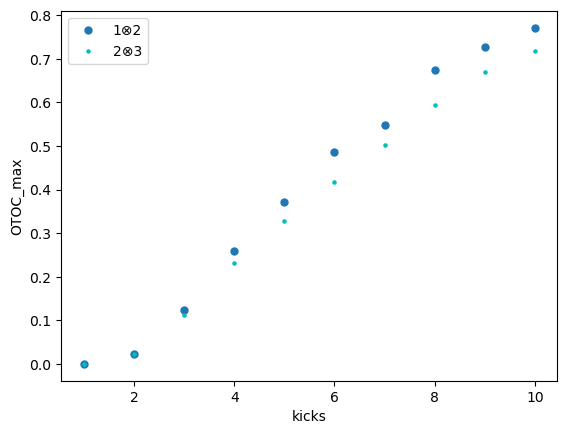

PyObject <matplotlib.legend.Legend object at 0x7fdb4544bb80>

In [11]:
plt.figure(figsize=(10,5))
plt.plot(time_array',OTOC12_max',".",markersize=10, label = "1⊗2")
plt.plot(time_array',OTOC23_max',"c.",markersize=4.5,label = "2⊗3")
plt.xlabel("kicks")
#plt.yscale("log")
plt.ylabel("OTOC_max")
plt.legend()
#plt.savefig("plots/monogamyOTOC/monogamyOTOC j1j2=$j1 k1k2=$k1.png")

In [107]:
# If on-off is present.
t_off = 3
t_on = 50


OTOC12_max_onoff = zeros(1,kicks)
OTOC23_max_onoff = zeros(1,kicks)

# making Hilbert space in bigger Hilbert space
A_Jz2 =  identityoperator(b1) ⊗ exp(dense(im*Jz2)) ⊗ identityoperator(b3)
B1_Jz1 =   exp(dense(im*Jz1)) ⊗ identityoperator(b2) ⊗ identityoperator(b3)
B2_Jz3 =  identityoperator(b1) ⊗ identityoperator(b2) ⊗ exp(dense(im*Jz3))

At = dense(A_Jz2)
B2 = dense(B1_Jz1)
B3 = dense(B2_Jz3)
for i = 1:kicks
    commutator2 = At * B2 - B2 * At
    OTOC12_max_onoff[1,i] = (1/d)*tr(dagger(commutator2)*commutator2)
    
    commutator3 = At * B3 - B3 * At
    OTOC23_max_onoff[1,i] = (1/d)*tr(dagger(commutator3)*commutator3)
    
    if i < t_off || i ≥ t_on
        At = U*At*dagger(U)
    else
        At = U_off23*At*dagger(U_off23)
    end
end


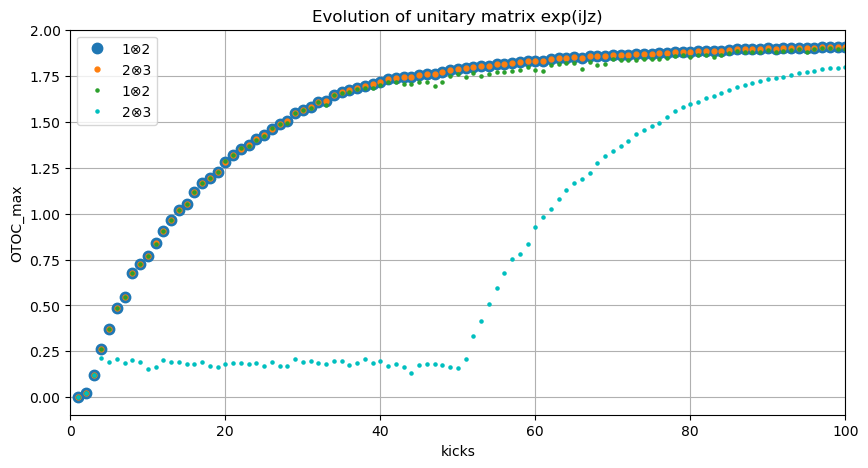

In [109]:
plt.figure(figsize=(10,5))
plt.plot(time_array',OTOC12_max', ".",markersize=15, label = "1⊗2")
plt.plot(time_array',OTOC23_max',".",markersize=7,label = "2⊗3")
plt.plot(time_array',OTOC12_max_onoff',".",markersize=4.5, label = "1⊗2")
plt.plot(time_array',OTOC23_max_onoff',"c.",markersize=4.5,label = "2⊗3")
plt.xlim(0,100)
plt.xlabel("kicks")
plt.ylabel("OTOC_max")
plt.title("Evolution of unitary matrix exp(iJz)")
plt.legend()
plt.grid()
#plt.savefig("plots/monogamyOTOC/monogamyOTOC_unitary j1j2=$j1 k1k2=$k1 toff=$t_off ton=$t_on.png")

In [7]:
# data saving
#save_data = [time_array; OTOC_max]
#npzwrite("data/OTOCmax_Jz1I_IJz2$j1 $j2 $k1 $k2 $δ $kicks $t_off $t_on $ϵpow.npy", save_data)
#println("data saved in name of: OTOCmax_Jz1I_IJz2$j1 $j2 $k1 $k2 $δ $kicks $t_off $t_on $ϵpow.npy")

##  3 kicked top Hamiltonians Version 2.0
For understanding the entanglement groth and information scrambling.

In [1]:
using QuantumOptics
import PyPlot as plt
using SparseArrays
using LinearAlgebra
using Plots
using Statistics
using FastExpm

In [2]:
#------------------------------------------------
# Parameters
k1 = 5;
k2 = 10;
k3 = 6;
j1 = 8
j2 = 10
j3 = 9
p = 1.4
ϵpow= 14; ϵ = 10.0^(-ϵpow) #precision
Δ12 = 1; Δ23 = 1 # coupling strength.
N1 = convert(Int64,2*j1+1) # N1 is the dimension of the 1st hilbert space (2j1 +1).
N2 = convert(Int64,2*j2+1) # N2 is the dimension of the 2nd hilbert space (2j2 +1).
N3 = convert(Int64,2*j3+1) # N3 is the dimension of the 3rd hilbert space (2j3 +1)
#------------------------------------------------

# Basis
b1 = SpinBasis(j1)
b2 = SpinBasis(j2)
b3 = SpinBasis(j3)

# Operator creation
Jy1 = 0.5*sparse(sigmay(b1).data)
Jz1 = 0.5*sparse(sigmaz(b1).data)

Jy2 = 0.5*sparse(sigmay(b2).data)
Jz2 = 0.5*sparse(sigmaz(b2).data)

Jy3 = 0.5*sparse(sigmay(b3).data)
Jz3 = 0.5*sparse(sigmaz(b3).data)

19×19 SparseMatrixCSC{ComplexF64, Int64} with 18 stored entries:
⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠁⢄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠑⠄

In [24]:
# Floquet operators
# U1 for j=j1
U1 = fastExpm(-1im*k1*Jz1*Jz1/(2*j1), threshold=1e-15,nonzero_tol=ϵ)*fastExpm(-1im*p*Jy1,threshold=1e-15,nonzero_tol = ϵ);
# U2 for j=j2
U2 = fastExpm(-1im*k2*Jz2*Jz2/(2*j2),threshold=1e-15 ,nonzero_tol=ϵ)*fastExpm(-1im*p*Jy2,threshold=1e-15 ,nonzero_tol = ϵ);
# U3 for j=j3
U3 = fastExpm(-1im*k3*Jz3*Jz3/(2*(j3+1/2)),threshold=1e-15,nonzero_tol=ϵ) * fastExpm(-1im*p*Jy3,threshold=1e-15,nonzero_tol = ϵ);

# U12 Floquet for coupling term
U12 = fastExpm(-1im * Δ12* (kron(Jz1,Jz2)) / (2 * sqrt(j1 * j2) ),threshold=1e-15,nonzero_tol = ϵ);
# U23 Floquet for coupling term
U23 = fastExpm(-1im * Δ23*kron(Jz2,Jz3) / (2 * sqrt(j2 * j3)),threshold=1e-15 ,nonzero_tol = ϵ);

# U12 an U23 ∈ H1⊗H2⊗ H3
U12 = kron(U12,Matrix{ComplexF64}(I,N3,N3));
U23 = kron(Matrix{ComplexF64}(I,N1,N1),U23)

# Unitary floquet operator of whole system
U = U12*U23*kron(U1,U2,U3)
#U_off23 = U12*U23*kron(U1,U2,U3)

6783×6783 Matrix{ComplexF64}:
  -2.24028e-7+4.65133e-7im   …  -2.11439e-11+4.38996e-11im
  -1.12721e-7+1.84147e-6im       1.49957e-11-2.44977e-10im
   3.70656e-6+2.60516e-6im       6.95044e-10+4.88511e-10im
   4.47451e-6-7.59221e-6im       -1.18267e-9+2.00672e-9im
  -1.41442e-5+2.56071e-6im       -5.26959e-9+9.5402e-10im
   2.02354e-5+9.81304e-7im   …   -1.06265e-8-5.15323e-10im
  -2.35466e-5+8.74394e-6im       -1.74294e-8+6.47234e-9im
   4.94916e-6-2.72544e-5im       -5.16373e-9+2.84361e-8im
   2.72639e-5+2.27503e-6im        4.00957e-8+3.34578e-9im
   1.45977e-5+1.94147e-5im       -3.02603e-8-4.02457e-8im
   8.15213e-6+1.76146e-5im   …    2.38198e-8+5.14684e-8im
    1.0509e-5+9.1619e-6im         -4.3282e-8-3.77339e-8im
   8.47078e-6-2.94771e-6im        4.91754e-8-1.71123e-8im
             ⋮               ⋱  
    4.3282e-8+3.77339e-8im        -1.0509e-5-9.1619e-6im
   2.38198e-8+5.14684e-8im        8.15213e-6+1.76146e-5im
   3.02603e-8+4.02457e-8im       -1.45977e-5-1.94147e-5im
   4.0

In [17]:
# function for compatibility check of two matrix(or sparse matrix). true means compatible.
function iscomute(A,B,ϵ = 1e-14)
    comutator_f = A*B - B*A
    
    if issparse(comutator_f)  == true
        comutator_f = droptol!(comutator_f,ϵ)
        
    else
        comutator_f = sparse(comutator_f)
        comutator_f = droptol!(comutator_f,ϵ)
    end
    return comutator_f == spzeros(size(comutator_f)[1],size(comutator_f)[2])
end

iscomute (generic function with 2 methods)

In [41]:
Ry1 = fastExpm(-im*π*Jy1,threshold=1e-15);
Ry2 = fastExpm(-im*π*Jy2,threshold=1e-15);
Ry3 = fastExpm(-im*π*Jy3,threshold=1e-15);

Ry = kron(Ry1,Ry2,Ry3)

6783×6783 Matrix{ComplexF64}:
  4.42779e-47-0.0im    -2.426e-47+0.0im  …           1.0+0.0im
  2.68298e-47-0.0im   4.22997e-47-0.0im     -3.19833e-16+0.0im
   4.7348e-47-0.0im   6.16765e-48-0.0im     -4.66779e-16+0.0im
  1.25897e-47-0.0im  -1.29865e-47+0.0im     -6.27472e-17+0.0im
  5.23647e-47-0.0im  -1.32186e-47+0.0im     -2.41851e-17+0.0im
   2.5645e-47-0.0im   3.43019e-48-0.0im  …   2.01228e-16+0.0im
  5.57636e-47-0.0im  -1.65777e-47+0.0im     -1.09029e-16+0.0im
 -1.65861e-47+0.0im   2.48786e-47-0.0im      5.55094e-17+0.0im
 -9.03755e-48+0.0im    -3.487e-48+0.0im     -7.14104e-17+0.0im
 -1.55051e-47+0.0im    4.8224e-47-0.0im      1.79452e-16+0.0im
 -2.57182e-47+0.0im   3.98013e-47-0.0im  …  -1.00033e-16+0.0im
  3.62271e-47-0.0im   3.55523e-47-0.0im      3.41506e-17+0.0im
  -6.0895e-48+0.0im   -1.0575e-49+0.0im      7.26831e-17+0.0im
             ⋮                           ⋱  
  6.68394e-17+0.0im  -1.00257e-16+0.0im      4.23952e-49+0.0im
  3.64199e-17+0.0im   1.40521e-17+0.0im    